In [143]:
from __future__ import print_function

#import keras
import pickle
import operator
import numpy as np
import pandas as pd
#import tensorflow as tf
import plot_conf_matrix as pcm
#from keras import backend as K
#from keras.datasets import mnist
#from keras.engine.topology import Layer
#from keras.models import Sequential, Model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from os.path import isfile, join
from PIL import Image
from os import listdir
import random

def create_tile(files):
    random.shuffle(files)
    new_im = Image.new('RGB', (800,800))
    index = 0
    for i in range(0,800,200):
        for j in range(0,800,200):
            if index >= len(files):
                break
            image = Image.open(files[index])
            width  = image.size[0]
            height = image.size[1]

            aspect = width / float(height)

            ideal_width = 200
            ideal_height = 200

            ideal_aspect = ideal_width / float(ideal_height)

            if aspect > ideal_aspect:
                # Then crop the left and right edges:
                new_width = int(ideal_aspect * height)
                offset = (width - new_width) / 2
                resize = (offset, 0, width - offset, height)
            else:
                # ... crop the top and bottom:
                new_height = int(width / ideal_aspect)
                offset = (height - new_height) / 2
                resize = (0, offset, width, height - offset)

            thumb = image.crop(resize).resize((ideal_width, ideal_height), Image.ANTIALIAS)
            new_im.paste(thumb, (i,j))
            index += 1

    new_im.save("tile.png")
    plt.imshow(new_im)
    plt.show()

In [144]:
test = pd.read_csv('../Data/feret_table.csv')
test = test[test['race'] != "other"]
test = test[test['race'] != "african"]
test = test[test['race'] != "hispanic"]

print(test.shape,'test shape')

(7164, 133) test shape


In [145]:
with open('../Data/dynamic_pred_saved.pickle', 'rb') as fileObj:
    pred = pickle.load(fileObj)
    
pred = [max(enumerate(i), key=operator.itemgetter(1))[0] for i in pred.tolist()]

def change(x):
    if x == 0:
        return 'caucasian'
    elif x == 1:
        return 'eastasian'
    elif x == 2:
        return 'southasian'
    print(x)

pred = [change(i) for i in pred]
pd.Series(pred)

0        caucasian
1        caucasian
2        caucasian
3        caucasian
4        caucasian
5        caucasian
6        caucasian
7        caucasian
8       southasian
9        caucasian
10       caucasian
11       caucasian
12       caucasian
13       caucasian
14       caucasian
15       caucasian
16       caucasian
17       caucasian
18       caucasian
19       caucasian
20       caucasian
21       caucasian
22       caucasian
23       caucasian
24       caucasian
25       caucasian
26       caucasian
27       caucasian
28       caucasian
29       caucasian
           ...    
7134     caucasian
7135     caucasian
7136     caucasian
7137     caucasian
7138     caucasian
7139     caucasian
7140     caucasian
7141     caucasian
7142     caucasian
7143     caucasian
7144     caucasian
7145     caucasian
7146     caucasian
7147     caucasian
7148     caucasian
7149     caucasian
7150     caucasian
7151     caucasian
7152     caucasian
7153     caucasian
7154     caucasian
7155     cau

In [146]:
analysis = pd.DataFrame(test[['id','race']]).reset_index(drop=True)
analysis['prediction'] = pd.Series(pred)
analysis


,id,race,prediction
0,00222_940128_hr,caucasian,caucasian
1,00222_940128_hl,caucasian,caucasian
2,00222_940128_fa,caucasian,caucasian
3,00222_940128_fb,caucasian,caucasian
4,00017_930831_fa,southasian,caucasian
5,00017_930831_hr,southasian,caucasian
6,00017_930831_fb,southasian,caucasian
7,00017_930831_hl,southasian,caucasian
8,00140_941121_re,caucasian,southasian
9,00140_941121_ql,caucasian,caucasian


412
southasian    303
caucasian     109
Name: prediction, dtype: int64


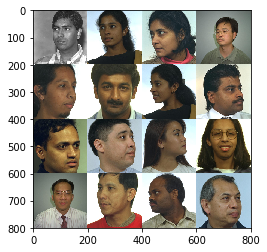

In [160]:
false_pred = analysis.loc[(analysis['race'] == 'eastasian') & (analysis['prediction'] != 'eastasian')]
images = ['../Data/FERET/'+i+'.jpeg' for i in false_pred['id'].tolist()]
print(len(false_pred))
print(false_pred['prediction'].value_counts())
create_tile(images)

In [152]:
f1_scores = f1_score(analysis['race'], analysis['prediction'], average=None)
pre_scores = precision_score(analysis['race'], analysis['prediction'], average=None)
rec_scores = recall_score(analysis['race'], analysis['prediction'], average=None)

correct = analysis[analysis['race'] == analysis['prediction']]
print(correct['race'].value_counts(), end='\n\n')
print(analysis['race'].value_counts(), end='\n\n')
print(analysis['prediction'].value_counts(), end='\n\n')

print('f1: ') 
print(f1_scores)
print('precision: ') 
print(pre_scores)
print('recall: ') 
print(rec_scores)

caucasian     4539
eastasian     1137
southasian     393
Name: race, dtype: int64

caucasian     5150
eastasian     1549
southasian     465
Name: race, dtype: int64

caucasian     4712
eastasian     1330
southasian    1122
Name: prediction, dtype: int64

f1: 
[0.92050294 0.78985759 0.4952741 ]
precision: 
[0.96328523 0.85488722 0.35026738]
recall: 
[0.88135922 0.73402195 0.84516129]


In [ ]:
print(results_noise_dyn, '\n\n')
print(np.sum(pd.DataFrame(dyn_model.layers[-3].get_weights()[0])))
pcm.plot_confusion_matrix(calc=False, grid = dyn_model.layers[-3].get_weights()[0], normalize=True, title="Updated weight matrix")
print("==== CF Dyn whole system =====")
pcm.plot_confusion_matrix(true_class=[max(enumerate(i), key=operator.itemgetter(1))[0] for i in y_test.tolist()], pred_class=[max(enumerate(i), key=operator.itemgetter(1))[0] for i in pred_dyn.tolist()], normalize=True)
print("==== CF Dyn base model =====")
pcm.plot_confusion_matrix(true_class=[max(enumerate(i), key=operator.itemgetter(1))[0] for i in y_test.tolist()], pred_class=[max(enumerate(i), key=operator.itemgetter(1))[0] for i in pred2_dyn.tolist()], normalize=True)

In [128]:
with open('../Data/default_results.pickle', 'rb') as fileObj:
    y = pd.DataFrame(pickle.load(fileObj))
    x = pd.concat([y, pd.DataFrame(y['parameters'].tolist())], axis=1).drop(['parameters'], axis=1)
print(x['f1'].describe())
print(x.corr(method='spearman'))
x

count    1.000000
mean     0.830867
std           NaN
min      0.830867
25%      0.830867
50%      0.830867
75%      0.830867
max      0.830867
Name: f1, dtype: float64
         f1  std  depth  dropout  dynamic  nodes  noise
f1      NaN  NaN    NaN      NaN      NaN    NaN    NaN
std     NaN  NaN    NaN      NaN      NaN    NaN    NaN
depth   NaN  NaN    NaN      NaN      NaN    NaN    NaN
dropout NaN  NaN    NaN      NaN      NaN    NaN    NaN
dynamic NaN  NaN    NaN      NaN      NaN    NaN    NaN
nodes   NaN  NaN    NaN      NaN      NaN    NaN    NaN
noise   NaN  NaN    NaN      NaN      NaN    NaN    NaN


,f1,std,activation,depth,dropout,dynamic,initializer,nodes,noise,optimizer
0,0.830867,0.003272,sigmoid,3,0.4,False,glorot_uniform,64,False,adadelta


In [126]:
with open('../Data/static_results.pickle', 'rb') as fileObj:
    y = pd.DataFrame(pickle.load(fileObj))
    x = pd.concat([y, pd.DataFrame(y['parameters'].tolist())], axis=1).drop(['parameters'], axis=1)
print(x['f1'].describe())
print(x.corr(method='spearman'))
x

count    5.000000
mean     0.825275
std      0.003543
min      0.821189
25%      0.822446
50%      0.825051
75%      0.828820
max      0.828867
Name: f1, dtype: float64
              f1  f1-noise-on  std  depth  dropout  dynamic  nodes  noise
f1           1.0          1.0 -0.4    NaN      NaN      NaN    NaN    NaN
f1-noise-on  1.0          1.0 -0.4    NaN      NaN      NaN    NaN    NaN
std         -0.4         -0.4  1.0    NaN      NaN      NaN    NaN    NaN
depth        NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
dropout      NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
dynamic      NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
nodes        NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
noise        NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN


,f1,f1-noise-on,std,activation,depth,dropout,dynamic,initializer,nodes,noise,noise_init,optimizer
0,0.821189,0.821189,0.010552,sigmoid,3,0.6,False,glorot_uniform,248,True,identity_kernel,adadelta
1,0.822446,0.822446,0.003591,sigmoid,3,0.6,False,glorot_uniform,248,True,identity_kernel,adadelta
2,0.825051,0.825051,0.006172,sigmoid,3,0.6,False,glorot_uniform,248,True,identity_kernel,adadelta
3,0.828820,0.828820,0.005275,sigmoid,3,0.6,False,glorot_uniform,248,True,identity_kernel,adadelta
4,0.828867,0.828867,0.005133,sigmoid,3,0.6,False,glorot_uniform,248,True,identity_kernel,adadelta


In [129]:
with open('../Data/dynamic_results.pickle', 'rb') as fileObj:
    y = pd.DataFrame(pickle.load(fileObj))
    x = pd.concat([y, pd.DataFrame(y['parameters'].tolist())], axis=1).drop(['parameters'], axis=1)
print(x['f1'].describe())
print(x.corr(method='spearman'))
x

count    2.000000
mean     0.844989
std      0.003257
min      0.842686
25%      0.843837
50%      0.844989
75%      0.846140
max      0.847292
Name: f1, dtype: float64
              f1  f1-noise-on  std  depth  dropout  dynamic  nodes  noise
f1           1.0          1.0  1.0    NaN      NaN      NaN    NaN    NaN
f1-noise-on  1.0          1.0  1.0    NaN      NaN      NaN    NaN    NaN
std          1.0          1.0  1.0    NaN      NaN      NaN    NaN    NaN
depth        NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
dropout      NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
dynamic      NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
nodes        NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN
noise        NaN          NaN  NaN    NaN      NaN      NaN    NaN    NaN


,f1,f1-noise-on,std,activation,depth,dropout,dynamic,initializer,nodes,noise,noise_init,optimizer
0,0.842686,0.827610,0.01012,sigmoid,2,0.6,True,glorot_uniform,32,True,identity_kernel,adadelta
1,0.847292,0.831193,0.01173,sigmoid,2,0.6,True,glorot_uniform,32,True,identity_kernel,adadelta
